In [1]:
import warnings  
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Relevant libraries from sklearn
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix #, ConfusionMatrixDisplay
from sklearn import metrics # Import the library for accuracy, precision and recall
from sklearn import svm # Import the library for the model named as 'SVM'
from sklearn.model_selection import cross_val_score # CV
from sklearn.preprocessing import MinMaxScaler

# Relevant libraries from sklearn Metric and Model Selection
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# SMOTE
from imblearn.over_sampling import SMOTE

# Relevant Stats Libraries
from scipy import stats
import statistics as stats

#https://github.com/parrt/dtreeviz/blob/master/notebooks/dtreeviz_sklearn_visualisations.ipynb
# Feature Importances
import dtreeviz
from yellowbrick.model_selection import FeatureImportances

from yellowbrick.classifier import (ConfusionMatrix, ROCAUC, ClassificationReport,
ClassPredictionError, ClassBalance)

import category_encoders as ce # Encode Categorical Variables
import missingno as msno
from ydata_profiling import ProfileReport

sns.set_style('darkgrid')
pd.options.display.float_format = '{:.2f}'.format
%matplotlib inline

In [2]:
df = pd.read_csv('BankChurners.csv')

In [ ]:
# pip install --upgrade scikit-learn imbalanced-learn

In [ ]:
# pip install --upgrade scikit-learn

In [ ]:
# pip install ydata-profiling

In [ ]:
# !pip install missingno

In [ ]:
# pip install dtreeviz

In [ ]:
# pip install yellowbrick

In [ ]:
ProfileReport(df)

## Data Wrangling

In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.00,777,11914.00,1.33,1144,42,1.62,0.06,0.00,1.00
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.00,864,7392.00,1.54,1291,33,3.71,0.10,0.00,1.00
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.00,0,3418.00,2.59,1887,20,2.33,0.00,0.00,1.00
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.00,2517,796.00,1.41,1171,20,2.33,0.76,0.00,1.00
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.00,0,4716.00,2.17,816,28,2.50,0.00,0.00,1.00


In [4]:
df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.00,1851,2152.00,0.70,15476,117,0.86,0.46,0.00,1.00
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.00,2186,2091.00,0.80,8764,69,0.68,0.51,1.00,0.00
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.00,0,5409.00,0.82,10291,60,0.82,0.00,1.00,0.00
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.00,0,5281.00,0.54,8395,62,0.72,0.00,1.00,0.00
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,10388.00,1961,8427.00,0.70,10294,61,0.65,0.19,1.00,0.00


In [5]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00
mean,739177606.33,46.33,2.35,35.93,3.81,2.34,2.46,8631.95,1162.81,7469.14,0.76,4404.09,64.86,0.71,0.27,0.16,0.84
std,36903783.45,8.02,1.30,7.99,1.55,1.01,1.11,9088.78,814.99,9090.69,0.22,3397.13,23.47,0.24,0.28,0.37,0.37
min,708082083.00,26.00,0.00,13.00,1.00,0.00,0.00,1438.30,0.00,3.00,0.00,510.00,10.00,0.00,0.00,0.00,0.00
25%,713036770.50,41.00,1.00,31.00,3.00,2.00,2.00,2555.00,359.00,1324.50,0.63,2155.50,45.00,0.58,0.02,0.00,1.00
50%,717926358.00,46.00,2.00,36.00,4.00,2.00,2.00,4549.00,1276.00,3474.00,0.74,3899.00,67.00,0.70,0.18,0.00,1.00
75%,773143533.00,52.00,3.00,40.00,5.00,3.00,3.00,11067.50,1784.00,9859.00,0.86,4741.00,81.00,0.82,0.50,0.00,1.00
max,828343083.00,73.00,5.00,56.00,6.00,6.00,6.00,34516.00,2517.00,34516.00,3.40,18484.00,139.00,3.71,1.00,1.00,1.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

There are no missing values


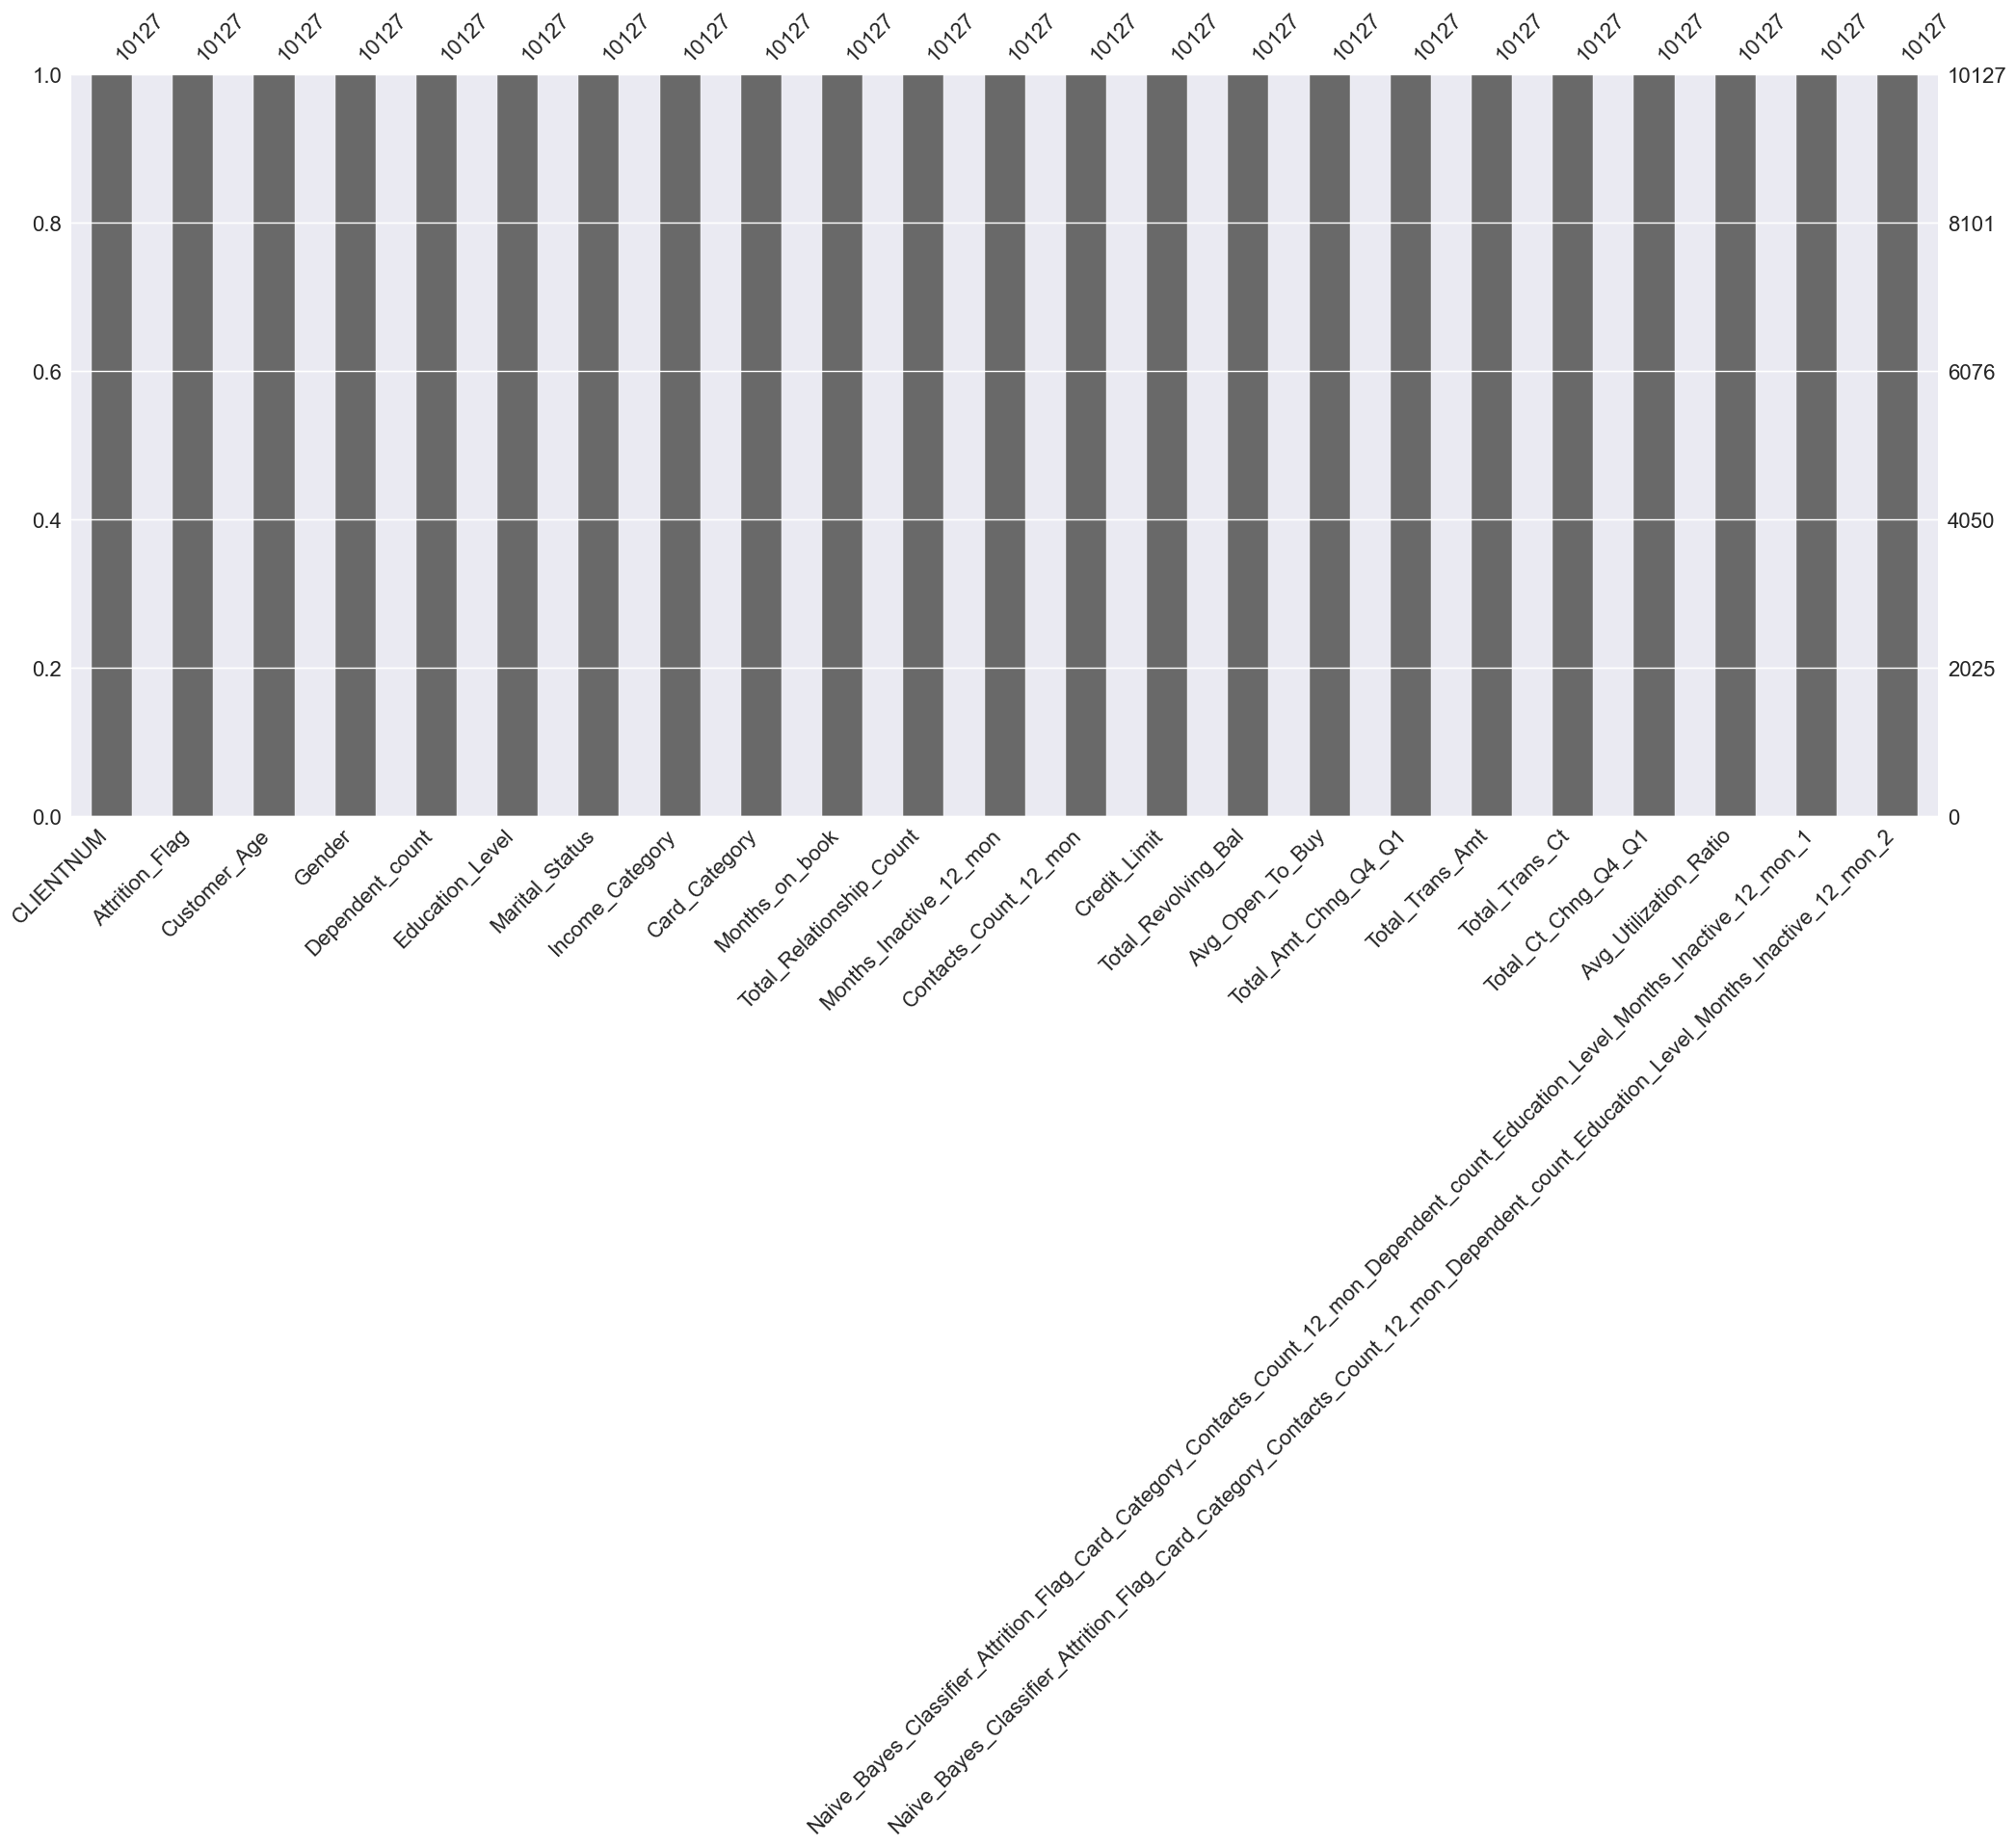

In [7]:
print('There are no missing values')
ax = msno.bar(df)

In [8]:
print('Total number of observations:', df.shape[0])
before_drop = df.shape[1]
print('Total number of attributes before dropping:', before_drop)

Total number of observations: 10127
Total number of attributes before dropping: 23


In [9]:
print('Columns BEFORE dropping:\n\n', df.columns)

Columns BEFORE dropping:

 Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')


### Dropping irrelevant columns

In [10]:
df = df.drop(['CLIENTNUM',
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

In [11]:
print('Total number of attributes BEFORE dropping:', before_drop)
print('Total number of attributes AFTER dropping:', df.shape[1])

Total number of attributes BEFORE dropping: 23
Total number of attributes AFTER dropping: 20


In [12]:
# if the number of unique values is less than 20 then the variable is likely to be categorical otherwise continuous.
df.nunique()

Attrition_Flag                 2
Customer_Age                  45
Gender                         2
Dependent_count                6
Education_Level                7
Marital_Status                 4
Income_Category                6
Card_Category                  4
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                6205
Total_Revolving_Bal         1974
Avg_Open_To_Buy             6813
Total_Amt_Chng_Q4_Q1        1158
Total_Trans_Amt             5033
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          830
Avg_Utilization_Ratio        964
dtype: int64

# Exploratory Data Analysis

In [13]:
# Target Variable - Binary Classification

print('Unique values in the target variable',df['Attrition_Flag'].unique())

Unique values in the target variable ['Existing Customer' 'Attrited Customer']


In [14]:
# Subsets with Exisisting Customers and Attritied Customers

df_existing = df[df['Attrition_Flag'] == 'Existing Customer']
df_attrition = df[df['Attrition_Flag'] == 'Attrited Customer']

In [15]:
target_variable = df['Attrition_Flag'].value_counts()
print(target_variable)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64


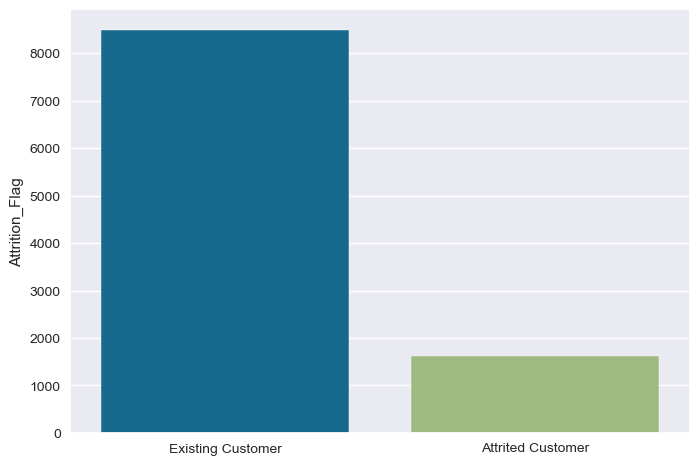

In [16]:
sns.barplot(x = target_variable.index, y = target_variable);

The Target variable distribution looks imbalanced. There are no enough number of rows for Attrited Customer for the ML algorithms to learn. We can apply SMOTE.

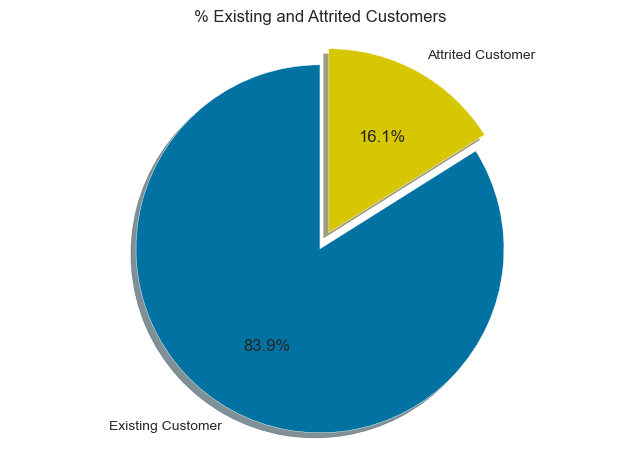

In [17]:
# Pie chart to display the percentage Existing and Attrited customers
# It is evident that around 16% of the customers have churned or exited.

attrition_label = df['Attrition_Flag'].value_counts()

explode = (0.1, 0)

plt.pie(attrition_label.values,
        labels=attrition_label.index,
        autopct='%1.1f%%',
        explode=explode,
        startangle=90,        
        shadow=True,
        colors=['b', 'y'])

plt.axis('equal') # Equal aspect ratio ensures the pie chart is circular.
plt.title('% Existing and Attrited Customers')

plt.show()

# https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.06-Bar-Charts-and-Pie-Charts/

### Overview of the values for Categorical Values

In [18]:
cat_var = ['Attrition_Flag', 'Gender', 'Education_Level',
            'Marital_Status', 'Income_Category', 'Card_Category']

for i in cat_var:
    print(i)
    print(df[i].value_counts()) 

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
Gender
F    5358
M    4769
Name: Gender, dtype: int64
Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


### Overview of the % for Categorical Values

In [19]:
cat_var = ['Attrition_Flag', 'Gender', 'Education_Level',
            'Marital_Status', 'Income_Category', 'Card_Category']

for i in cat_var:
    print(i)
    print(df[i].value_counts(normalize=True) * 100)

# https://pandas.pydata.org/pandas-docs/version/0.25.1/reference/api/pandas.Series.value_counts.html#:~:text=With%20normalize%20set%20to%20True,by%20the%20sum%20of%20values.&text=Bins%20can%20be%20useful%20for,number%20of%20half%2Dopen%20bins.

Attrition_Flag
Existing Customer   83.93
Attrited Customer   16.07
Name: Attrition_Flag, dtype: float64
Gender
F   52.91
M   47.09
Name: Gender, dtype: float64
Education_Level
Graduate        30.89
High School     19.88
Unknown         15.00
Uneducated      14.68
College         10.00
Post-Graduate    5.10
Doctorate        4.45
Name: Education_Level, dtype: float64
Marital_Status
Married    46.28
Single     38.94
Unknown     7.40
Divorced    7.39
Name: Marital_Status, dtype: float64
Income_Category
Less than $40K   35.16
$40K - $60K      17.68
$80K - $120K     15.16
$60K - $80K      13.84
Unknown          10.98
$120K +           7.18
Name: Income_Category, dtype: float64
Card_Category
Blue       93.18
Silver      5.48
Gold        1.15
Platinum    0.20
Name: Card_Category, dtype: float64


In [20]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once

def PlotBarCharts(inpData, colsToPlot):
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar Charts of:'+ str(colsToPlot))
    
    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        ax = inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber]) 
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

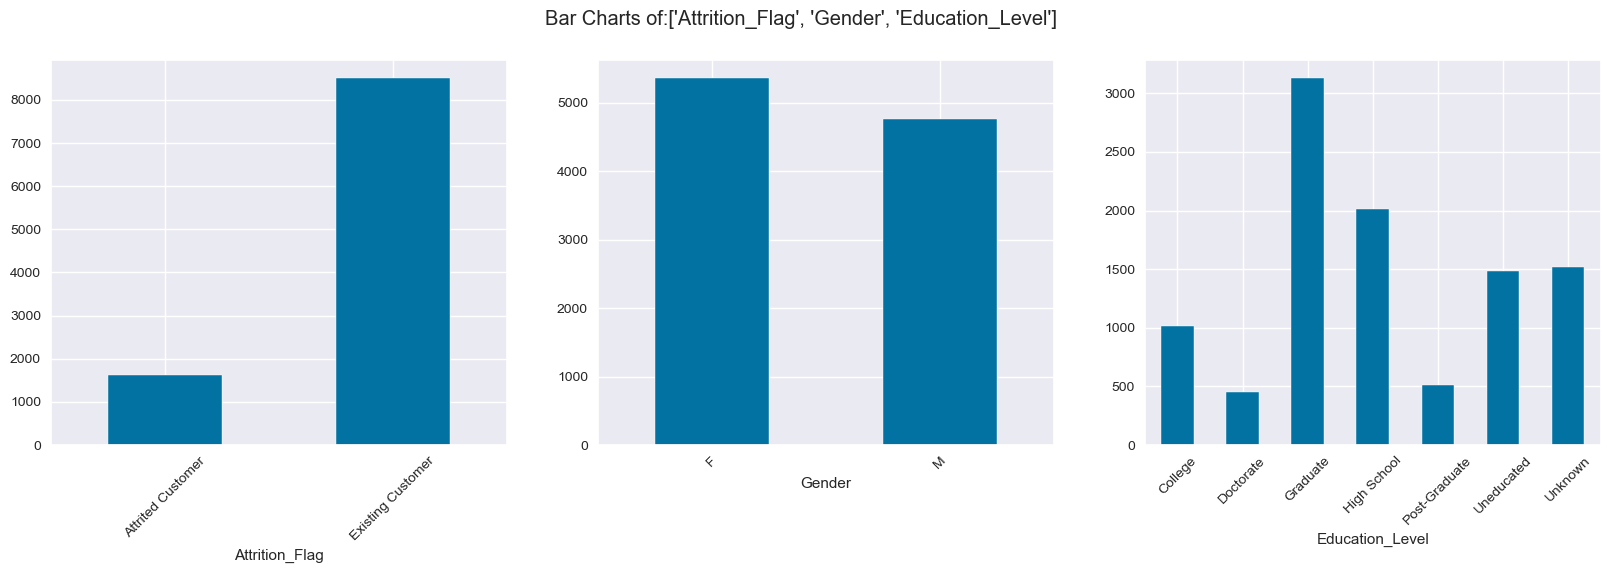

In [21]:
# Calling the function

PlotBarCharts(inpData=df, colsToPlot=['Attrition_Flag', 'Gender', 'Education_Level']);

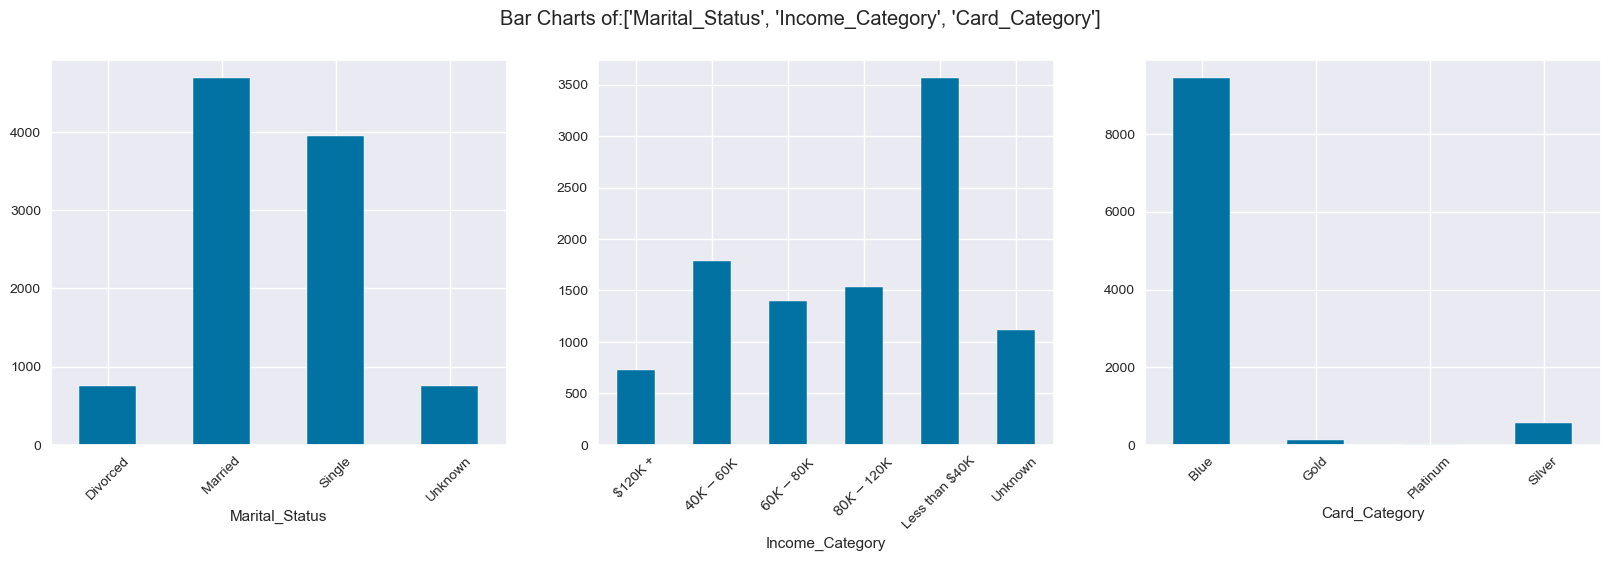

In [22]:
PlotBarCharts(inpData=df, colsToPlot=['Marital_Status', 'Income_Category', 'Card_Category']);

## Comparing our Target Variable with other Features

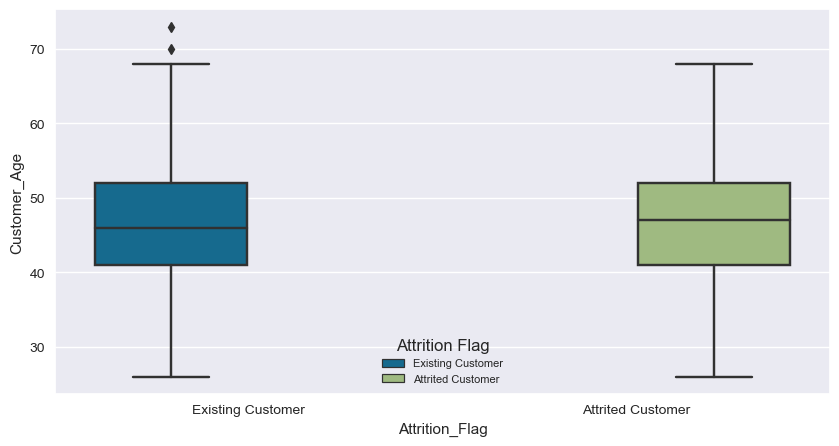

In [23]:
# Age

plt.figure(figsize=(10,5))

sns.boxplot(data=df, x='Attrition_Flag', y ='Customer_Age', hue='Attrition_Flag')
plt.legend(title='Attrition Flag', fontsize=8)
        
plt.show()

# https://seaborn.pydata.org/generated/seaborn.boxplot.html

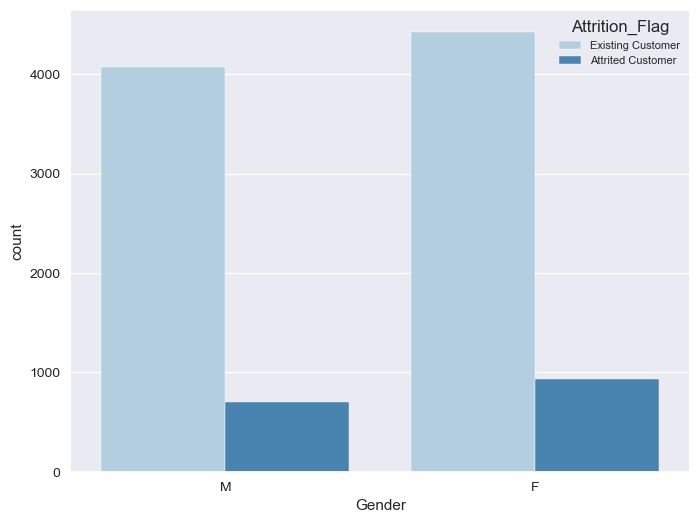

In [24]:
# Gender

plt.figure(figsize=(8,6))

sns.countplot(data=df, x='Gender', hue='Attrition_Flag', palette='Blues')

plt.legend(title='Attrition_Flag', fontsize=8);

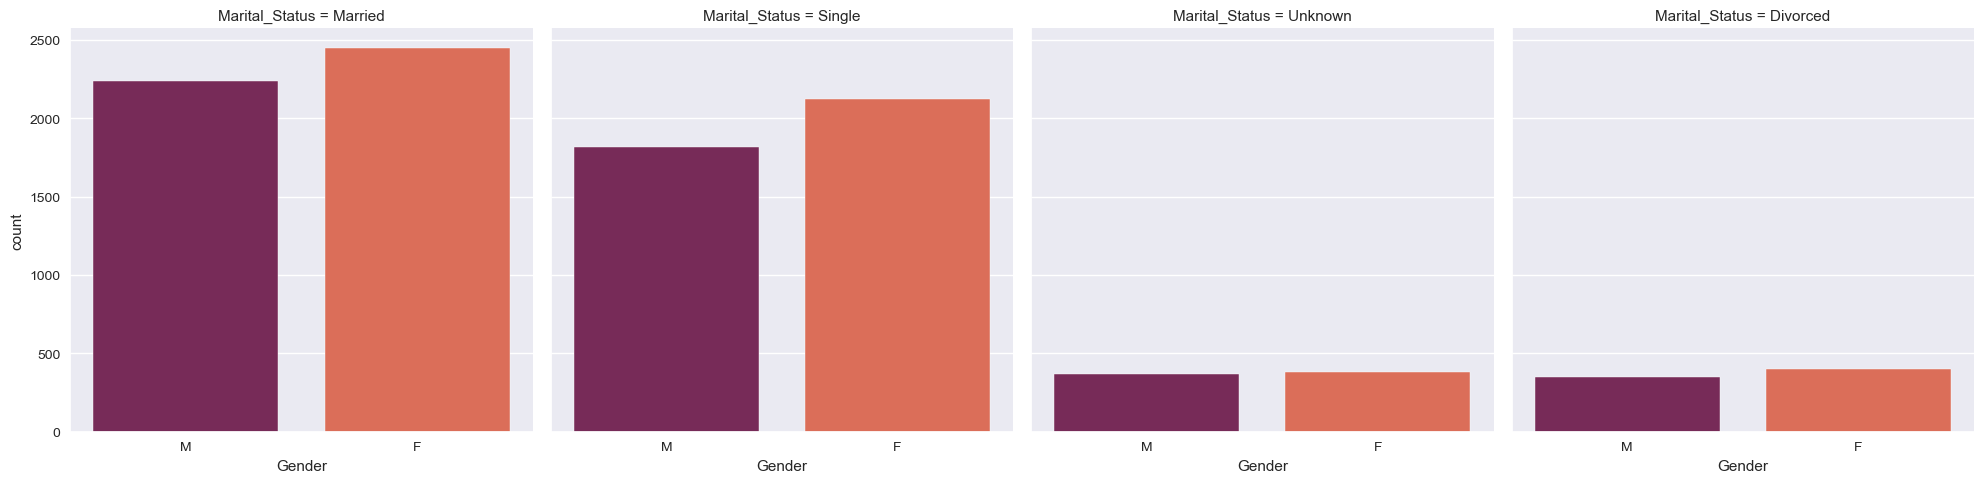

In [25]:
# Gender & Marital Status

sns.catplot(data=df, x='Gender', kind='count', col='Marital_Status', palette='rocket');

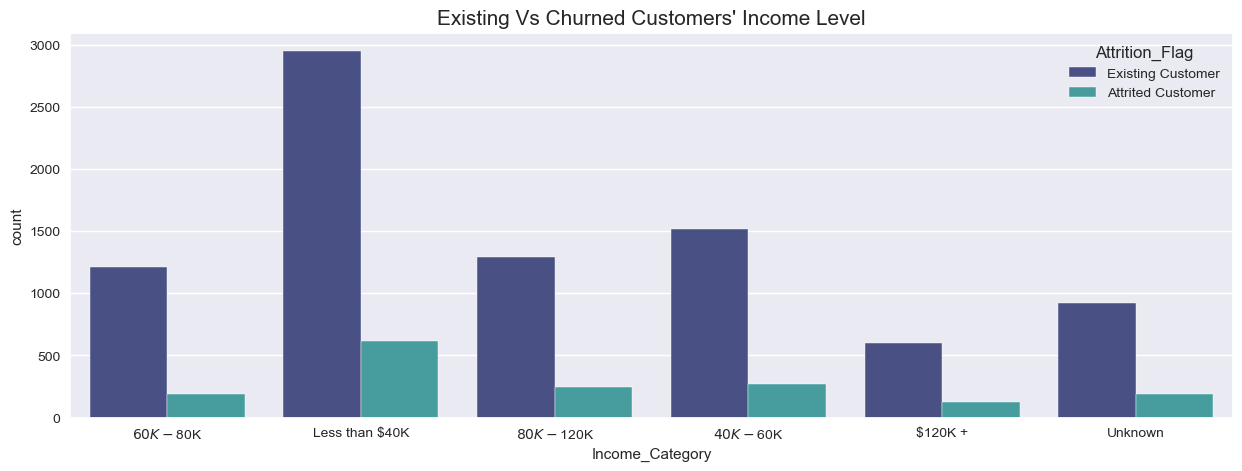

In [26]:
# Comparing Existing & Churned Customer's Income Level

plt.figure(figsize = (15,5))

sns.countplot(data=df, x='Income_Category', hue='Attrition_Flag', palette='mako');

plt.title("Existing Vs Churned Customers' Income Level",fontsize=15);

# ref: https://seaborn.pydata.org/generated/seaborn.countplot.html

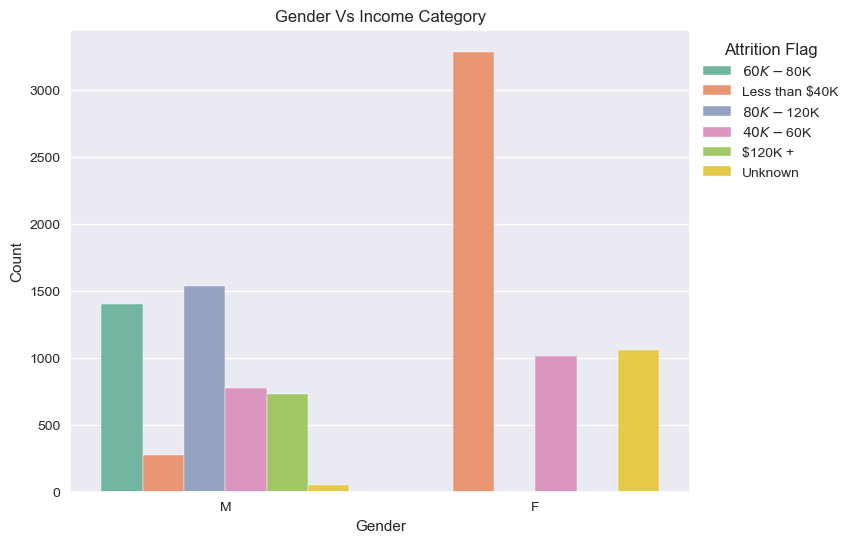

In [27]:
# Comparing Gender and Income Level

plt.figure(figsize=(8,6))

sns.countplot(data=df,x='Gender', hue='Income_Category',palette='Set2')

plt.title("Gender Vs Income Category")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title='Attrition Flag', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

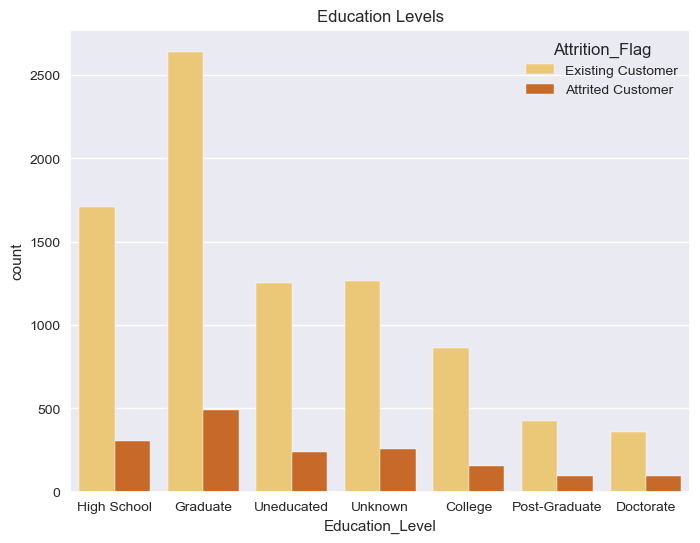

In [28]:
# Comparing Education level of Existing & Churned Customers

plt.figure(figsize=(8,6))

sns.countplot(data=df,x='Education_Level',hue='Attrition_Flag', palette='YlOrBr')
plt.title('Education Levels');

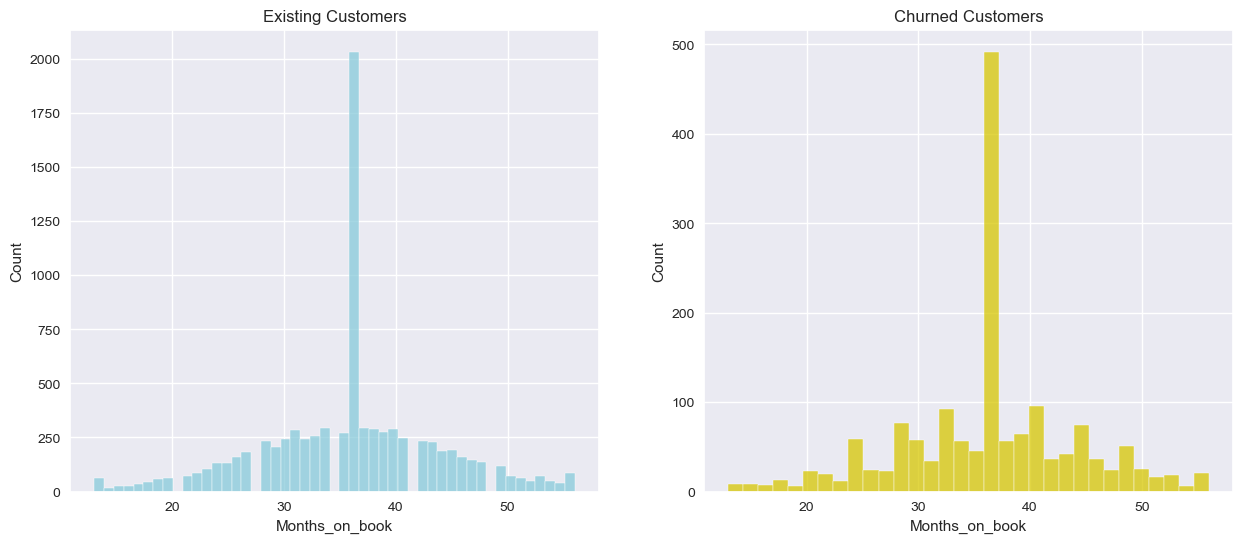

In [29]:
# How many months have they been cutomers?

plt.figure(figsize=(15, 6))

# Existing Customers
plt.subplot(1, 2, 1)
sns.histplot(data=df_existing, x='Months_on_book', color='c')
plt.title('Existing Customers')

# Churned Customers
plt.subplot(1, 2, 2)
sns.histplot(data=df_attrition, x='Months_on_book', color='y')
plt.title('Churned Customers')

plt.show()

3    2305
4    1912
5    1891
6    1866
2    1243
1     910
Name: Total_Relationship_Count, dtype: int64

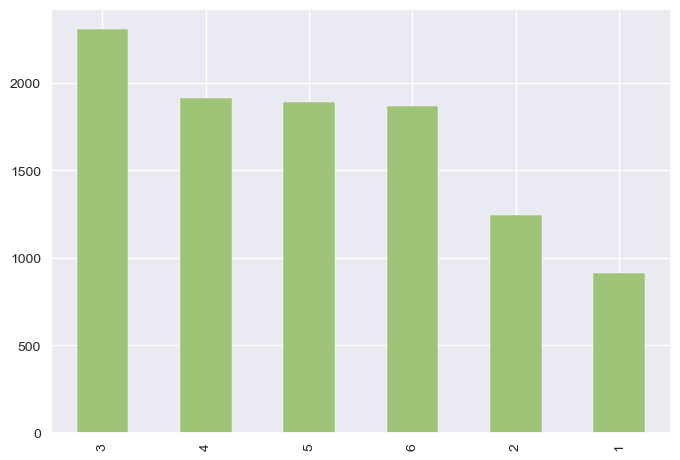

In [30]:
# How Many Services does the Customer Use?

df.Total_Relationship_Count.value_counts().plot(kind = 'bar', color = 'g');

df['Total_Relationship_Count'].value_counts()

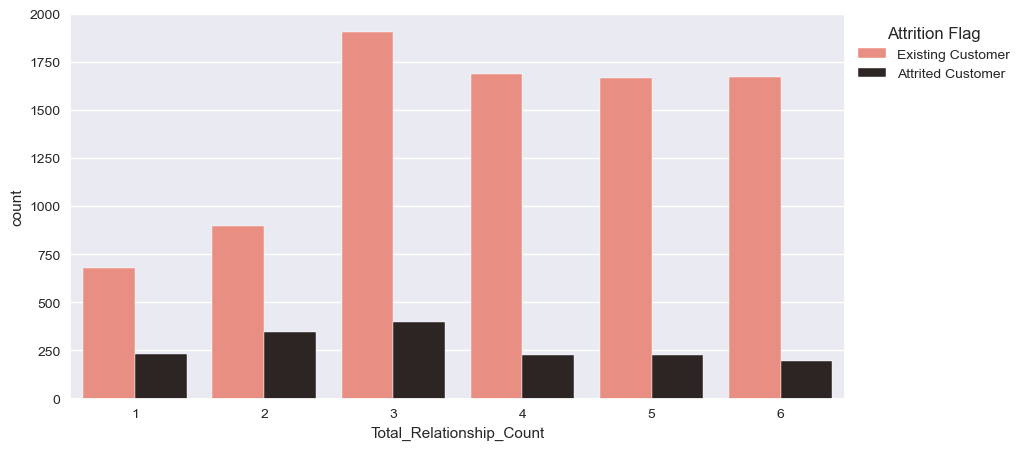

In [31]:
plt.figure(figsize = (10,5))

sns.countplot(data=df, x='Total_Relationship_Count', hue='Attrition_Flag',palette='dark:salmon_r')

plt.legend(title='Attrition Flag', loc='upper left', bbox_to_anchor=(1, 1));

# i.e. how many services they avail of with the bank. credit card = 1, credit card & checking account = 2, etc.
# Shows customer with more relationships are less likely to leave.

## Contact with Bank x Months Inactive

**Important analysis of our two most positively correlated features with our target variable**

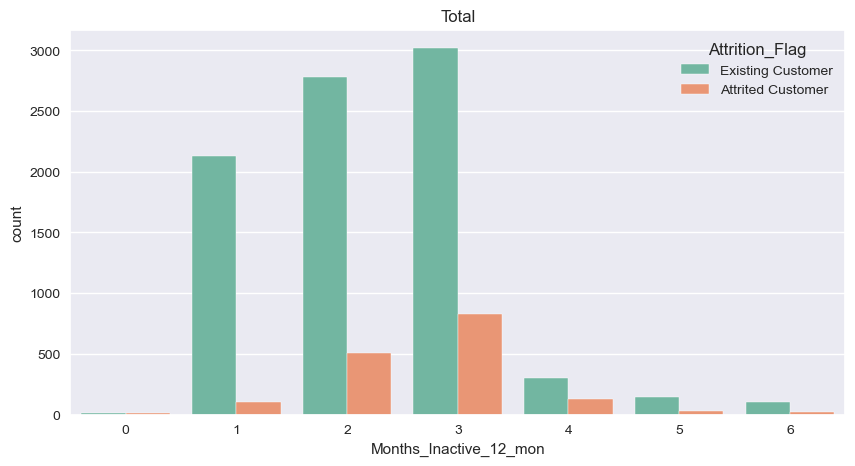

In [32]:
plt.figure(figsize = (10,5))

sns.countplot(data=df, x='Months_Inactive_12_mon', hue='Attrition_Flag', palette='Set2')
plt.title('Total');

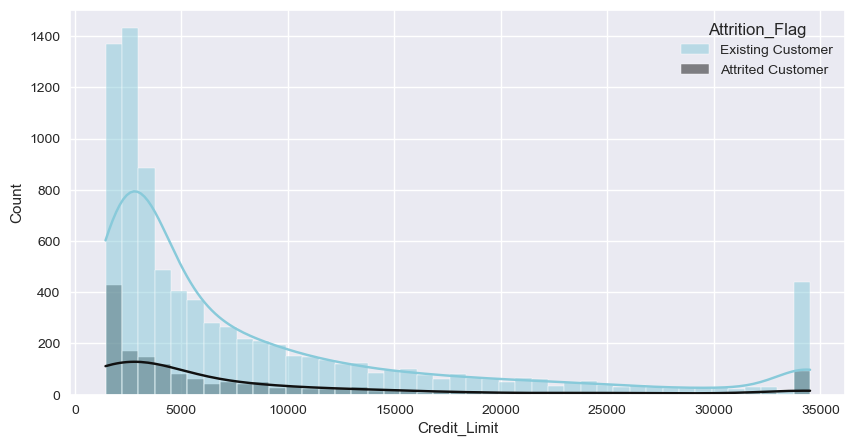

In [33]:
# Credit Offered to Customers

plt.figure(figsize=(10, 5))

sns.histplot( data=df, x='Credit_Limit', kde=True, hue='Attrition_Flag', palette=['c', 'k']);

## Transaction Amount x Transaction Count

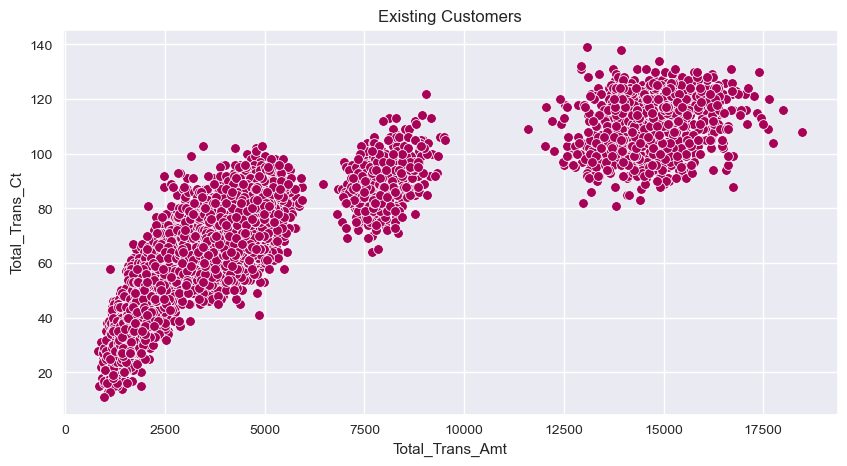

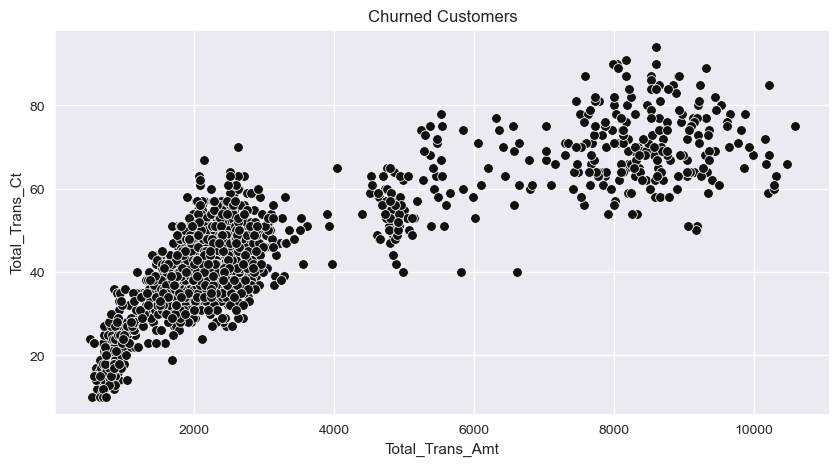

In [34]:
# Existing Customers
plt.figure(figsize = (10,5))
sns.scatterplot(x='Total_Trans_Amt', y='Total_Trans_Ct', data=df_existing, color = 'm')
plt.title('Existing Customers');

# Churned Customers
plt.figure(figsize = (10,5))
sns.scatterplot(x='Total_Trans_Amt', y='Total_Trans_Ct', data=df_attrition, color = 'k')
plt.title('Churned Customers');

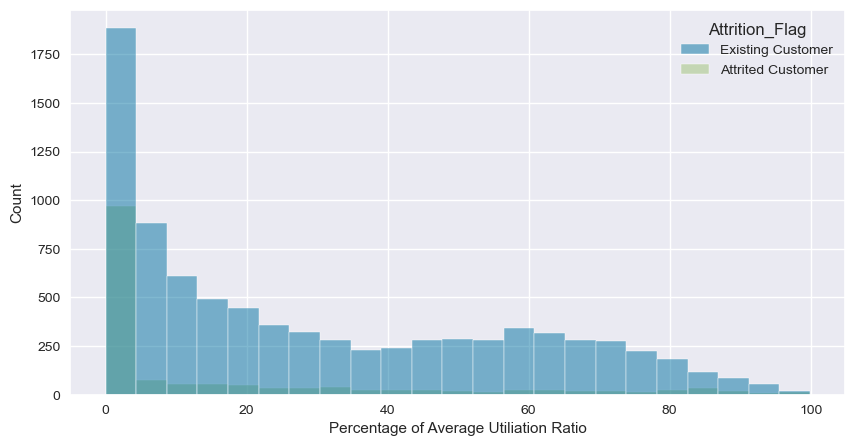

In [35]:
# What Percentage of their Credit Limit are Customers Using?

avg_ratio = df['Avg_Utilization_Ratio']*100

plt.figure(figsize=(10,5))

sns.histplot(data=df, x=avg_ratio, hue='Attrition_Flag')

plt.xlabel('Percentage of Average Utiliation Ratio');

## Correlations among features

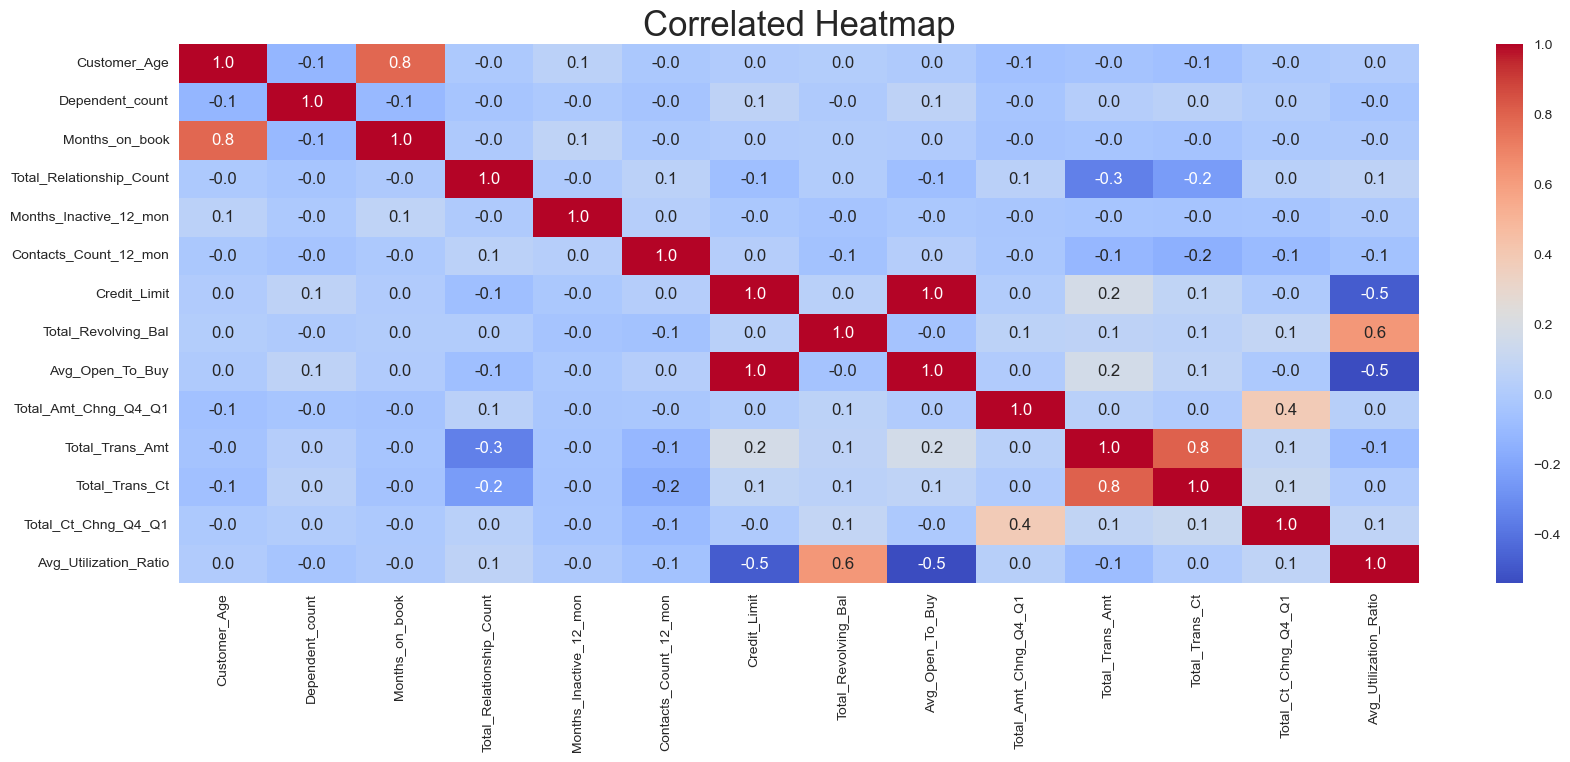

In [36]:
plt.figure(figsize = (20,7))
correlation = df.corr()
heatmap = sns.heatmap(correlation,vmin=None,
           cmap='coolwarm',
           annot=True,
           fmt='.1f',
           linecolor='red',
           cbar=True)
heatmap.set_title('Correlated Heatmap', fontdict={'fontsize': 25});

# https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

In [37]:
corr_matrix = df.corr()

# Positive correlations 
pos_corr_features = corr_matrix[(corr_matrix >= 0.7)]
pos_corr_features = pos_corr_features.unstack().dropna().reset_index()

# Negative correlations 
neg_corr_features = corr_matrix[(corr_matrix <= -0.5)]
neg_corr_features = neg_corr_features.unstack().dropna().reset_index()

# Combine the positive and negative correlation results
high_corr_features = pd.concat([pos_corr_features, neg_corr_features]).reset_index(drop=True)
high_corr_features.columns = ['Feature_1', 'Feature_2', 'Correlation']

# Filter out rows where feature_1 and feature_2 are the same
high_corr_features = high_corr_features[high_corr_features['Feature_1'] != high_corr_features['Feature_2']]

# Displaying high correlated features
high_corr_features.sort_values(by='Correlation', ascending=False)

,Feature_1,Feature_2,Correlation
9,Credit_Limit,Avg_Open_To_Buy,1.00
11,Avg_Open_To_Buy,Credit_Limit,1.00
15,Total_Trans_Amt,Total_Trans_Ct,0.81
16,Total_Trans_Ct,Total_Trans_Amt,0.81
1,Customer_Age,Months_on_book,0.79
3,Months_on_book,Customer_Age,0.79
20,Avg_Open_To_Buy,Avg_Utilization_Ratio,-0.54
21,Avg_Utilization_Ratio,Avg_Open_To_Buy,-0.54


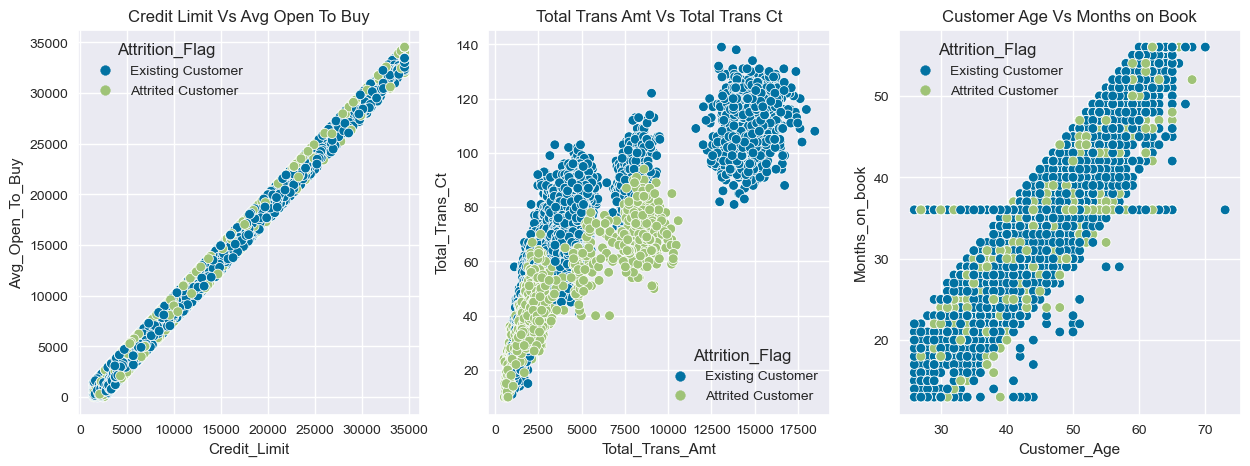

In [38]:
# Scatter plots for positive correlations

# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(data=df, x='Credit_Limit', y='Avg_Open_To_Buy', hue='Attrition_Flag', ax=axes[0])
axes[0].set_title('Credit Limit Vs Avg Open To Buy')

sns.scatterplot(data=df, x='Total_Trans_Amt', y='Total_Trans_Ct', hue='Attrition_Flag', ax=axes[1])
axes[1].set_title('Total Trans Amt Vs Total Trans Ct')

sns.scatterplot(data=df, x='Customer_Age', y='Months_on_book', hue='Attrition_Flag', ax=axes[2])
axes[2].set_title('Customer Age Vs Months on Book')

plt.show()

# https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8

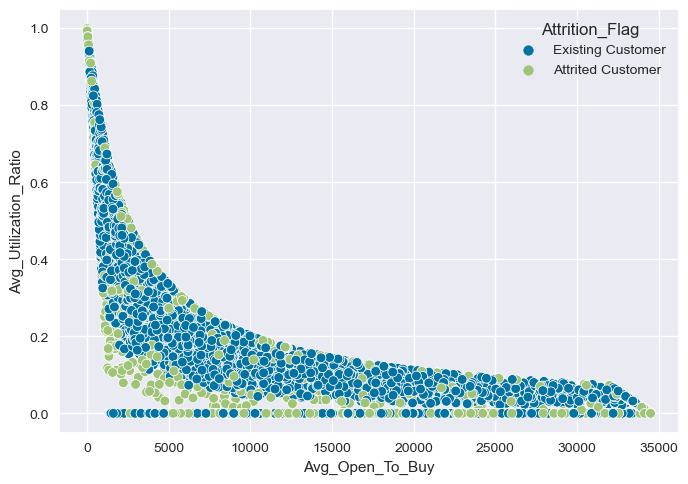

In [39]:
# Scatter plot for negative correlation

sns.scatterplot(data=df, x='Avg_Open_To_Buy', y='Avg_Utilization_Ratio', hue='Attrition_Flag')
plt.show()

# Machine Learning Models

## Modeling - build and train the machine learning models using the prepared data.

Using the customer's banking data to predict whether a customer will churn or not given his/her banking data

In [40]:
df_ml = df.copy()

In [41]:
df_ml.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.00,777,11914.00,1.33,1144,42,1.62,0.06
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.00,864,7392.00,1.54,1291,33,3.71,0.10
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.00,0,3418.00,2.59,1887,20,2.33,0.00
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.00,2517,796.00,1.41,1171,20,2.33,0.76
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.00,0,4716.00,2.17,816,28,2.50,0.00


In [42]:
# Encoding Categorical variables into numerical variables

# Select the categorical columns
cat_data = ['Attrition_Flag', 'Gender', 'Education_Level', 
            'Marital_Status', 'Income_Category', 'Card_Category']

# Define the encoder
encoder = ce.OrdinalEncoder(cols=cat_data, return_df=True)

# Fit and transform the encoder on the entire dataset
encoded_cat_data = encoder.fit_transform(df_ml)

In [43]:
# Making these changes permanent
df_ml[cat_data] = encoded_cat_data[cat_data]

In [44]:
df_ml.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,1,1,1,1,39,5,1,3,12691.00,777,11914.00,1.33,1144,42,1.62,0.06
1,1,49,2,5,2,2,2,1,44,6,1,2,8256.00,864,7392.00,1.54,1291,33,3.71,0.10
2,1,51,1,3,2,1,3,1,36,4,1,0,3418.00,0,3418.00,2.59,1887,20,2.33,0.00
3,1,40,2,4,1,3,2,1,34,3,4,1,3313.00,2517,796.00,1.41,1171,20,2.33,0.76
4,1,40,1,3,3,1,1,1,21,5,1,0,4716.00,0,4716.00,2.17,816,28,2.50,0.00


## Splitting the Data

Separate the dataset into X (input features) and y (target variable):

In [45]:
# The most suitable target variable is Attrition_Flag as it represents whether a customer has churned/exited or not.
# Define X variable and Target Variable (y)
# We need to split the data into independent and dependent variable

X = df_ml.drop(['Attrition_Flag'], axis=1) # Independent Variable
y = df_ml['Attrition_Flag'] # Target variable 

# Display the X and y arrays
print(X, y)

       Customer_Age  Gender  Dependent_count  Education_Level  Marital_Status  \
0                45       1                3                1               1   
1                49       2                5                2               2   
2                51       1                3                2               1   
3                40       2                4                1               3   
4                40       1                3                3               1   
...             ...     ...              ...              ...             ...   
10122            50       1                2                2               2   
10123            41       1                2                4               4   
10124            44       2                1                1               1   
10125            30       1                2                2               3   
10126            43       2                2                2               1   

       Income_Category  Car

In [46]:
X.shape, y.shape

((10127, 19), (10127,))

### Splitting the Data-Set into Training Set and Test Set

Data is divided into the Train set and Test set. We use the Train set to make the algorithm learn the data’s behavior and then check the accuracy of our model on the Test set. Features (X): The columns that are inserted into our model will be used to make predictions. Prediction (y): Target variable that will be predicted by the features.

Repeat this process three times with different test set sizes (10%, 20%, and 30%) and then apply cross-validation to evaluate the performance of the model on each of these training sets.

random_state simply sets a seed to the random generator, so that your train-test splits are always deterministic. If we don't set a seed, it is different each time.

### Scaling The Data
We ensured that we scaled the data after splitting so we could scale the train & test separately, therefore preventing data leakage (Brownlee, 2016)

# Support Vector Machine

### 70/30 Training/Test Split
Splitting the data into the training set (80%) and the testing set (20%)

In [47]:
# 70% training and 30% test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [48]:
# Display the rows and columns (dimensions) of an unsplitted dataset
print('Total number of rows and columns for the complete dataset: ', X.shape, y.shape)

# Display the rows and columns (dimensions) of the splitted dataset
print('Number of rows and columns after splitting dataset: ', X_train.shape, X_test.shape, y_train.shape, y_test.shape )

Total number of rows and columns for the complete dataset:  (10127, 19) (10127,)
Number of rows and columns after splitting dataset:  (7088, 19) (3039, 19) (7088,) (3039,)


### Scaling 70/30 data

In [49]:
cont_variables = ['Customer_Age','Dependent_count','Months_on_book', 'Total_Relationship_Count', 
                 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
                 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
                 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

scaler = MinMaxScaler()

X_train[cont_variables] = scaler.fit_transform(X_train[cont_variables])

X_test[cont_variables] = scaler.transform(X_test[cont_variables])

In [50]:
print(X_train.head())
print(X_train.describe())

      Customer_Age  Gender  Dependent_count  Education_Level  Marital_Status  \
415           0.55       1             0.40                6               1   
3749          0.83       2             0.00                1               2   
9295          0.02       1             0.00                5               3   
8290          0.62       2             0.20                4               1   
7672          0.43       2             0.60                1               2   

      Income_Category  Card_Category  Months_on_book  \
415                 1              1            0.58   
3749                6              1            0.88   
9295                3              3            0.14   
8290                2              1            0.53   
7672                2              1            0.53   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
415                       0.40                    0.33                   0.00   
3749                

In [ ]:
# We've taken all the data points and put them between 0 and 1
# We transform the data but structurally we have not changed it
# These data transformation (normalization) help our ML model in your predictions
# How we transform the data to assit our ML model - garbage in, garbage out - We try to make our data a bit better

# min         0.0000
# max         1.0000

### 70/30 SMOTE

In [51]:
smt = SMOTE()
X_train_res, y_train_res = smt.fit_resample(X_train, y_train)

In [52]:
print('Class distribution before SMOTE: \n', pd.Series(y_train).value_counts())
print('\nClass distribution after SMOTE: \n', pd.Series(y_train_res).value_counts())

Class distribution before SMOTE: 
 1    5957
2    1131
Name: Attrition_Flag, dtype: int64

Class distribution after SMOTE: 
 1    5957
2    5957
Name: Attrition_Flag, dtype: int64


# SVM

In [53]:
# Train an SVM model on the resampled training data
model = SVC()
model.fit(X_train_res, y_train_res)

SVC()

In [54]:
# Support Vector Machines(SVM)
clf = svm.SVC(C=3, kernel='rbf', gamma=0.1)

# Printing all the parameters of SVM
print(clf)

SVC(C=3, gamma=0.1)


In [55]:
# Creating the model on Training Data
SVM=clf.fit(X_train,y_train)
prediction=SVM.predict(X_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           1       0.91      0.98      0.94      2543
           2       0.85      0.50      0.63       496

    accuracy                           0.90      3039
   macro avg       0.88      0.74      0.79      3039
weighted avg       0.90      0.90      0.89      3039



### Class Balance Visual

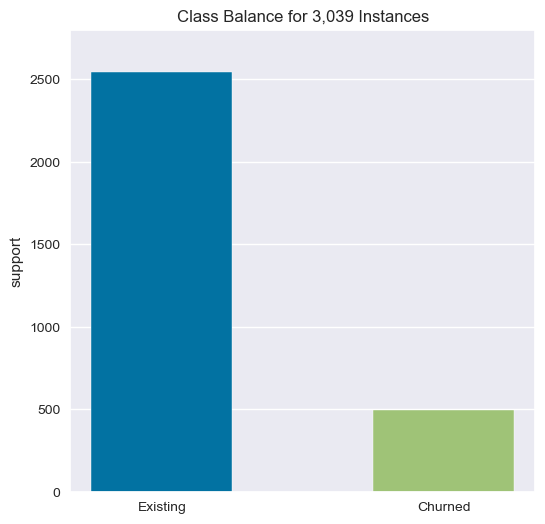

In [87]:
fig, ax = plt.subplots(figsize=(6, 6))
cb_viz = ClassBalance(
    labels=['Existing', 'Churned'])

cb_viz.fit(y_test)
cb_viz.poof();

### SVM Test Score

In [56]:
print('SVM Test Score:',SVM.score(X_test,y_test))

SVM Test Score: 0.9039157617637381


### Confusion Matrix

In [57]:
SVM.classes_

array([1, 2])

In [78]:
mapping = {1:'Existing', 2:'Churned'}
classesMapped = [mapping.get(value, value) for value in clf.classes_]
classesMapped

['Existing', 'Churned']

In [59]:
cm = metrics.confusion_matrix(y_test, prediction)
print(cm)

[[2498   45]
 [ 247  249]]


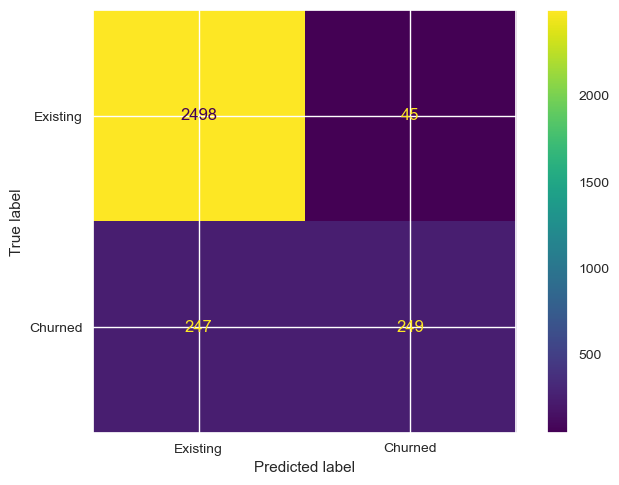

In [60]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classesMapped)


disp.plot()
plt.show()

In [76]:
pd.DataFrame(confusion_matrix(y_test, clf.predict(X_test)),
    columns=["Predict Customers", "Predict Churned"],
    index=["Existing Customers", "Churned Customers"],)

,Predict Customers,Predict Churned
Existing Customers,2498,45
Churned Customers,247,249


In [61]:
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

Accuracy of the model on Testing Sample Data: 0.89


In [64]:
# Running 5-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test

Accuracy_Values=cross_val_score(SVM, X , y, cv=5, scoring='f1_weighted')
print('\nAccuracy values for 5-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.7656769  0.7656769  0.76626067 0.76626067 0.76626067]

Final Average Accuracy of the model: 0.77
